In [139]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [140]:
gaussian = (1/9)*np.array([[1, 1, 1],
                           [1, 1, 1],
                           [1, 1, 1]])

sobelX= np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])

sobelY= np.array([[-1,-2,-1],
                   [0, 0, 0],
                   [1, 2, 1]])

# laplacian, edge filter
laplacian=np.array([[0, 1, 0],
                    [1,-4, 1],
                    [0, 1, 0]])

filters = {"gaussian":gaussian, 
           "sobel_x":sobelX, 
           "sobel_y":sobelY, 
           "laplacian":laplacian}

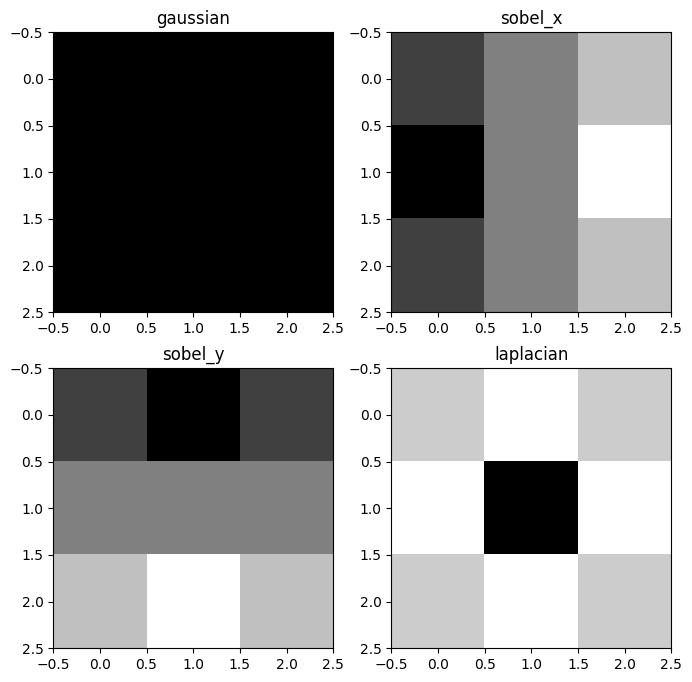

In [141]:
fg, ax = plt.subplots(nrows=2, ncols=2, figsize=(8,8))
for i, filter in enumerate(filters):

    ax[i // 2][i % 2].set_title(filter)
    ax[i // 2][i % 2].imshow(filters[filter], cmap='gray')

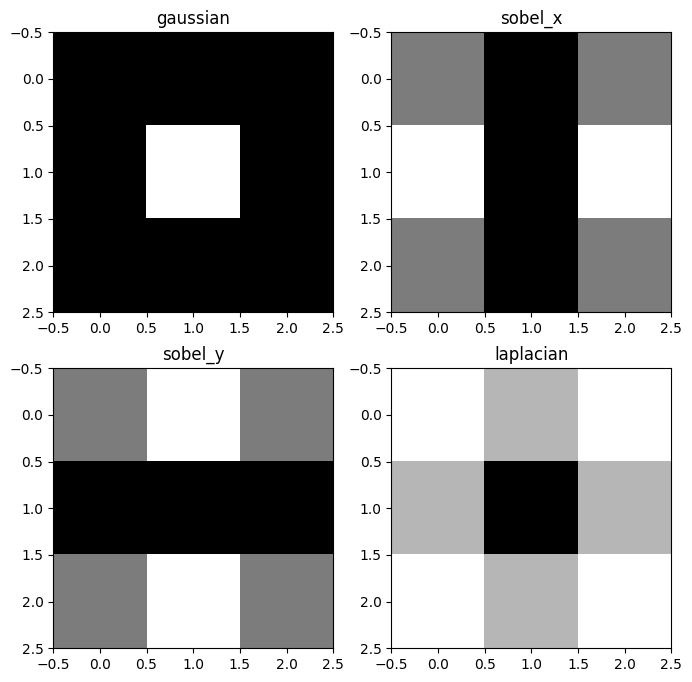

In [142]:
fourie_filters = [np.fft.fft2(filters[filter]) for filter in filters]
shifted_filters = [np.fft.fftshift(x) for x in fourie_filters]
frequency_tx = [np.log(np.abs(z)+1) for z in shifted_filters]

fg, ax = plt.subplots(nrows=2, ncols=2, figsize=(8,8))
iter_filter = iter(filters)
for i, frequency in enumerate(frequency_tx):
    filter = next(iter_filter)
    ax[i // 2][i % 2].set_title(filter)
    ax[i // 2][i % 2].imshow(frequency, cmap='gray')

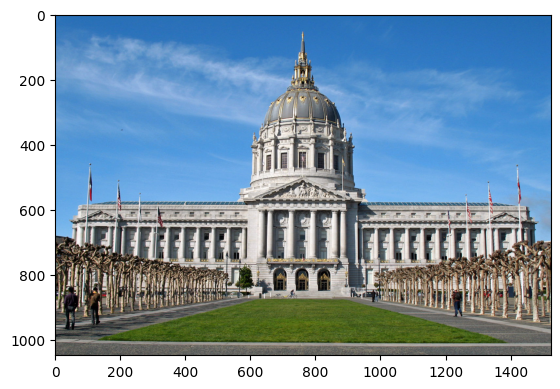

In [143]:
image = cv2.imread("..\\images\\city_hall.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

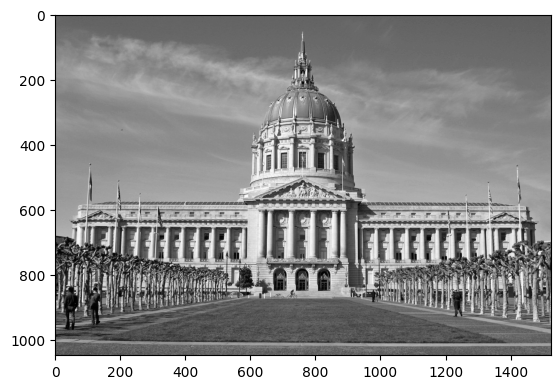

In [144]:
image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(image_gray, cmap="gray")

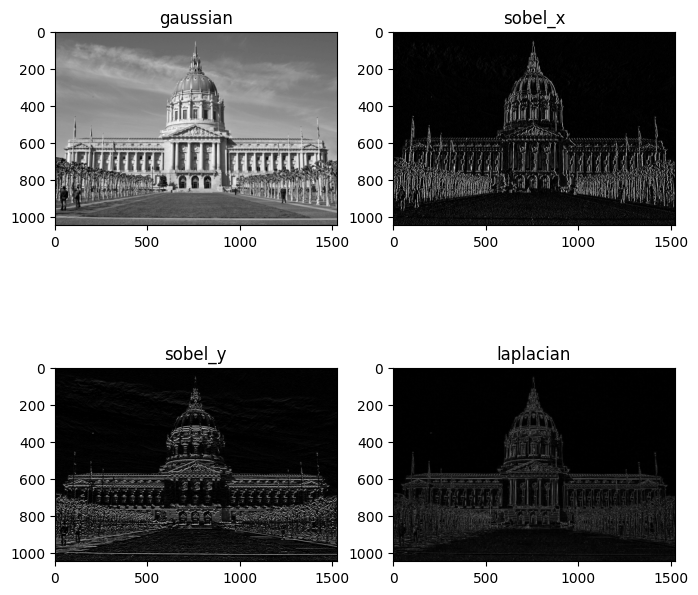

In [145]:
image_filters = [cv2.filter2D(image_gray, -1, filters[x]) for x in filters]
fg, ax = plt.subplots(nrows=2, ncols=2, figsize=(8,8))
iter_filter = iter(filters)
for i, filtered_image in enumerate(image_filters):
    filter = next(iter_filter)
    ax[i // 2][i % 2].set_title(filter)
    ax[i // 2][i % 2].imshow(filtered_image, cmap='gray')

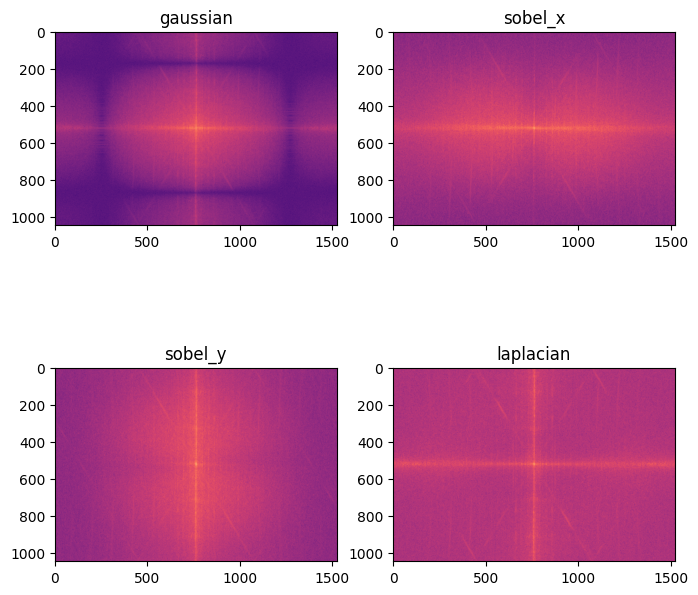

In [146]:
fourie_filters = [np.fft.fft2(fitered_image) for fitered_image in image_filters]
shifted_filters = [np.fft.fftshift(x) for x in fourie_filters]
frequency_tx = [np.log(np.abs(z)+1) for z in shifted_filters]

fg, ax = plt.subplots(nrows=2, ncols=2, figsize=(8,8))
iter_filter = iter(filters)
for i, frequency in enumerate(frequency_tx):
    filter = next(iter_filter)
    ax[i // 2][i % 2].set_title(filter)
    ax[i // 2][i % 2].imshow(frequency, cmap='magma')

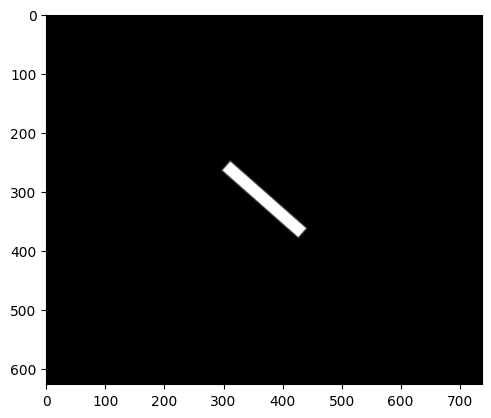

In [147]:
image = cv2.imread("..\\images\\white_stripe.png")
image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(image_gray, cmap="gray")

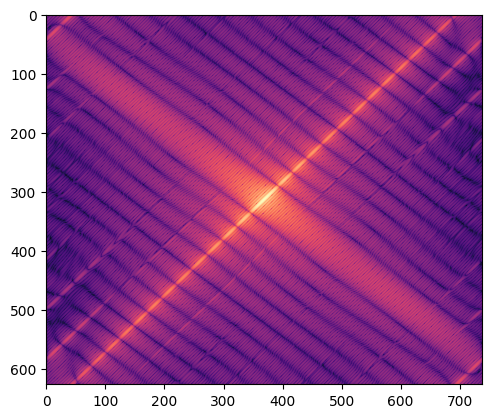

In [148]:
fourie_white_stripe = np.fft.fft2(image_gray)
shifted_filters = np.fft.fftshift(fourie_white_stripe)
frequency_tx = np.log(np.abs(shifted_filters)+1)

plt.imshow(frequency_tx, cmap="magma")

In [149]:
frequency_tx = np.log(np.abs(shifted_filters)+1)


(626, 738)
(626, 738, 3) uint8
(626, 738) uint8


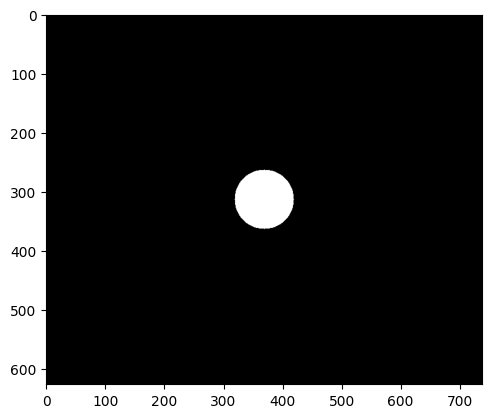

In [150]:
mask = np.zeros_like(frequency_tx, dtype=np.uint8)
# mask_3d = np.expand_dims(mask, axis=-1)
print(mask.shape)
mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)
print(mask.shape, mask.dtype)
h, w, c = mask.shape
cv2.circle(mask, (w//2, h//2), 50, (255,255,255), -1)
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
print(mask.shape, mask.dtype)
plt.imshow(mask, cmap="gray")



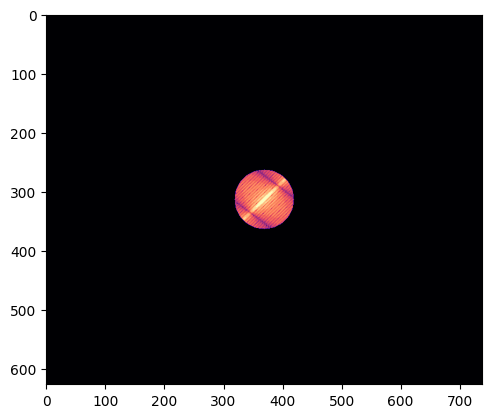

In [153]:
mask2 = frequency_tx.astype("uint8")
bitwise_and = cv2.bitwise_and(mask2, mask)
plt.imshow(bitwise_and, cmap="magma")



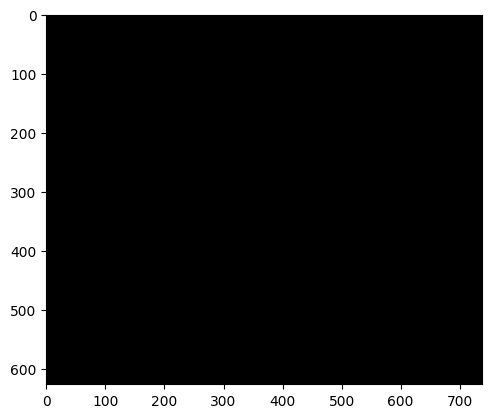

In [156]:
ifft_shift = np.fft.ifftshift(bitwise_and)
ifft_img = np.fft.ifft2(ifft_shift)
abs_img = np.abs(ifft_img).astype(np.uint8)

plt.imshow(abs_img, cmap="gray")

In [ ]:
np.rea